In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [ ]:
print(df.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
features = df.columns[:-1]  # Assuming the last column is the target or label
X = df[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
linked = linkage(X_scaled, method='ward')



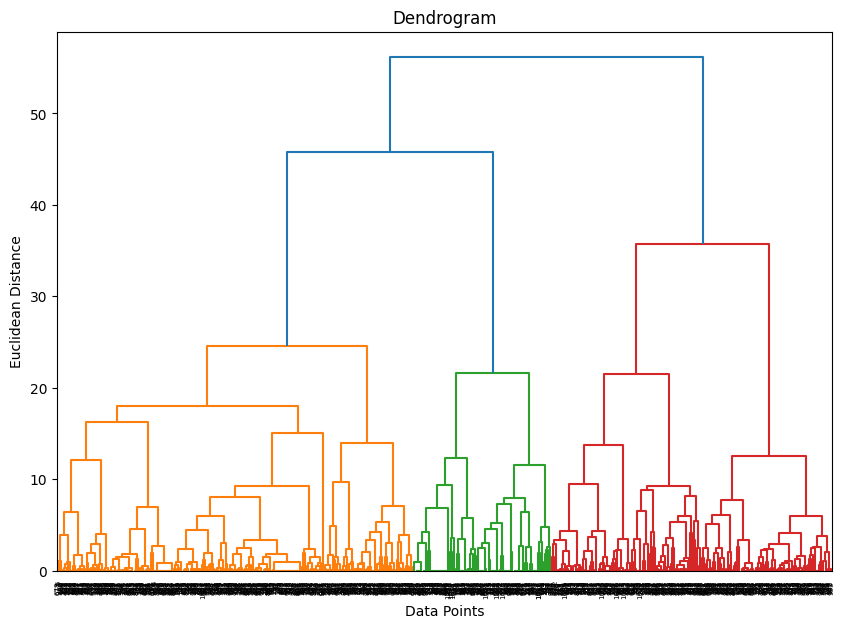

In [ ]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
n_clusters = 3  # Choose the number of clusters based on the dendrogram
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical_model.fit_predict(X_scaled)


In [ ]:
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

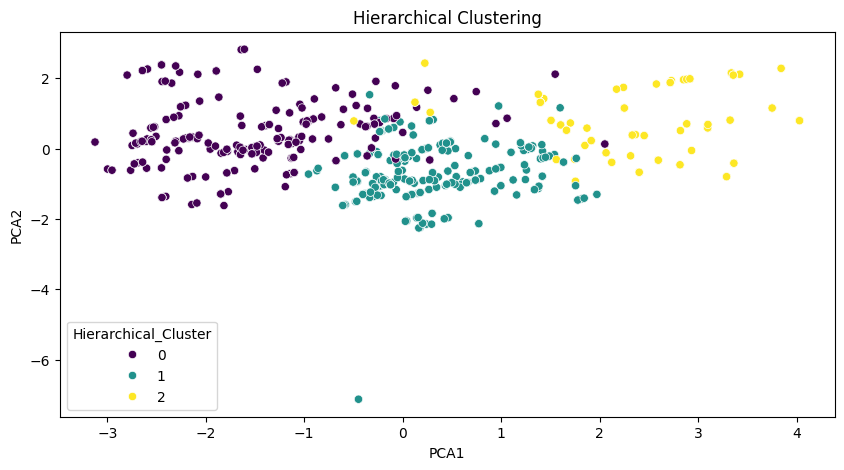

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

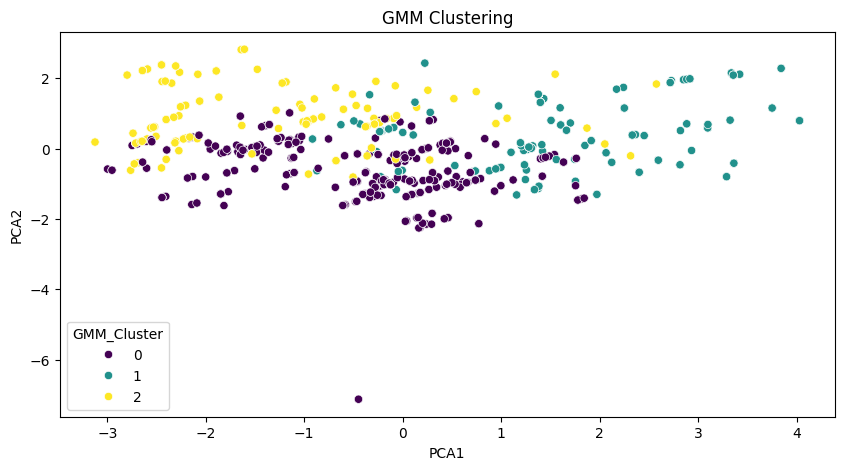

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM_Cluster', data=df, palette='viridis')
plt.title('GMM Clustering')
plt.show()

In [ ]:
# Select only numeric columns before computing the mean
numeric_columns = df.select_dtypes(include=[np.number])

# Compute the mean for numeric features grouped by GMM clusters
cluster_summary = numeric_columns.groupby(df['GMM_Cluster']).mean()

print(cluster_summary)

                   Age  SystolicBP  DiastolicBP         BS    BodyTemp  \
GMM_Cluster                                                              
0            24.137037  111.746296    74.938889   7.122611   98.000000   
1            47.212121  124.087121    85.492424  12.564773   98.000000   
2            22.819048  103.242857    69.019048   8.023048  101.211429   

             HeartRate  Hierarchical_Cluster  GMM_Cluster      PCA1      PCA2  
GMM_Cluster                                                                    
0            72.731481              0.709259          0.0 -0.363225 -0.585993  
1            76.159091              1.647727          1.0  1.848569  0.461751  
2            76.004762              0.047619          2.0 -1.389909  0.926353  


In [ ]:
def health_recommendation(cluster):
    if cluster == 0:
        return "Maintain regular check-ups and a balanced diet."
    elif cluster == 1:
        return "Monitor blood pressure regularly and reduce sodium intake."
    elif cluster == 2:
        return "Engage in regular physical activity and manage stress levels."
    else:
        return "Consult with a healthcare provider for personalized advice."

df['Recommendation'] = df['GMM_Cluster'].apply(health_recommendation)

In [ ]:
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

   Hierarchical_Cluster  GMM_Cluster      PCA1      PCA2  \
0                     2            1  1.431977  1.418768   
1                     2            1  2.122005 -0.392294   
2                     0            2 -1.285461  1.089671   
3                     1            0  0.996259 -1.055355   
4                     1            0 -0.460422 -0.152627   

                                      Recommendation  
0  Monitor blood pressure regularly and reduce so...  
1  Monitor blood pressure regularly and reduce so...  
2  Engage in regular physical activ

In [ ]:
# Save results to a CSV file
df.to_csv('/content/maternal_health_results.csv', index=False)

print("Results saved as maternal_health_results.csv in /content/")


Results saved as maternal_health_results.csv in /content/


In [ ]:
from google.colab import files
files.download('/content/maternal_health_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>